### Part I: Importing the Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('/mnt/d/WSL/Mental-Disorder-Classification/Dataset-Mental-Disorders.csv')
df.head(5)

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [49]:
df.drop('Patient Number', axis=1, inplace=True)

In [50]:
df.sample(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
13,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,5 From 10,7 From 10,5 From 10,Normal
85,Sometimes,Sometimes,Most-Often,Usually,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES,2 From 10,4 From 10,1 From 10,Bipolar Type-2
103,Sometimes,Most-Often,Sometimes,Seldom,NO,NO,YES,YES,NO,YES,YES,YES,YES,NO,7 From 10,4 From 10,5 From 10,Normal
58,Sometimes,Sometimes,Most-Often,Usually,NO,NO,YES,YES,NO,NO,NO,YES,YES,YES,3 From 10,7 From 10,4 From 10,Depression
21,Usually,Sometimes,Sometimes,Sometimes,YES,YES,YES,NO,YES,YES,NO,NO,NO,YES,6 From 10,4 From 10,6 From 10,Bipolar Type-1


### Understanding the dataset

#### Shape of the dataset

In [51]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 120
Number of columns: 18


#### Finding NULL Values in the dataset

In [52]:
df.isnull().sum()

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

##### Here the dataset does not have any null values

#### I have extracted the numeric data from string

In [53]:
df['Sexual Activity'] = df['Sexual Activity'].str.extract('(\d)').astype(float)
df.rename(columns={'Sexual Activity': 'Sexual Activity (scale of 10)'}, inplace=True)

df['Concentration'] = df['Concentration'].str.extract('(\d+)').astype(float)
df.rename(columns={'Concentration': 'Concentration (scale of 10)'}, inplace=True)

df['Optimisim'] = df['Optimisim'].str.extract('(\d+)').astype(float)
df.rename(columns={'Optimisim': 'Optimisim (scale of 10)'}, inplace=True)



In [55]:
df.sample(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10),Expert Diagnose
87,Usually,Seldom,Sometimes,Sometimes,YES,NO,YES,NO,NO,YES,NO,YES,YES,YES,9.0,2.0,8.0,Bipolar Type-1
41,Most-Often,Seldom,Most-Often,Most-Often,YES,YES,YES,NO,YES,NO,YES,YES,NO,YES,2.0,2.0,2.0,Bipolar Type-2
71,Seldom,Seldom,Sometimes,Sometimes,YES,YES,NO,YES,YES,YES,YES,YES,YES,YES,5.0,3.0,5.0,Bipolar Type-2
55,Sometimes,Seldom,Usually,Usually,NO,NO,YES,NO,NO,YES,YES,YES,NO,NO,3.0,4.0,3.0,Normal
50,Sometimes,Sometimes,Sometimes,Seldom,NO,NO,NO,YES,NO,YES,YES,NO,YES,NO,4.0,4.0,6.0,Normal


#### Plotting the datatypes

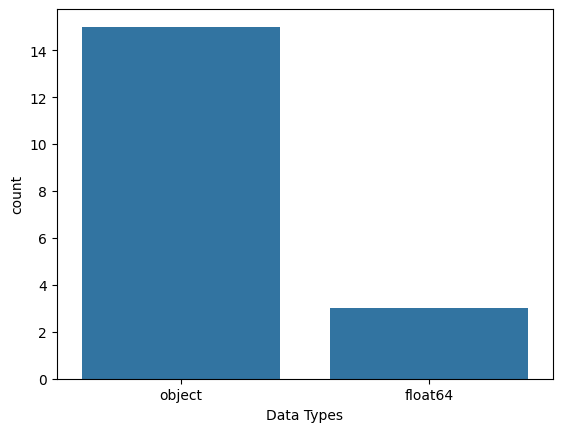

In [54]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['Data Types'])

# Create a count plot
sns.countplot(x='Data Types', data=dtypes_df)
plt.show()

#### Statistical Interpretation

In [56]:
df.describe()

,Sexual Activity (scale of 10),Concentration (scale of 10),Optimisim (scale of 10)
count,120.000000,120.000000,120.000000
mean,4.741667,4.250000,4.466667
std,2.010459,1.797524,1.991298
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,5.000000,4.000000,4.000000
75%,6.000000,5.000000,6.000000
max,9.000000,8.000000,9.000000


#####   Sexual Activity (scale of 10): well we find that the median is 5 and (min,max) ranges from (1,9)

#####    Concentration (scale of 10) : well we find that the median is 4 and (min,max) ranges from (1,8)

#####    Optimisim (scale of 10) : well we find that the median is 4 and (min,max) ranges from (1,9)